In [12]:
import numpy as np
import matplotlib.pyplot as plt
time_X_pulse_start = 80
time_2nd_X_pulse_start = 240
from fit_cosine_curve import *

In [13]:
def flip_around_average(arr):
    avg_value = np.mean(arr)
    flipped_arr = avg_value - (arr - avg_value)
    return flipped_arr

Fitted Parameters:
Amplitude (A): -3102.761426163638
Angular Frequency (w): 0.32380349997020863
Time Shift (t_0): -164.86395487566023
Vertical Shift (A_0): 57961.6091645924
Fitted Parameters:
Amplitude (A): -3020.4836836877516
Angular Frequency (w): 0.32490774175782905
Time Shift (t_0): -164.21469315493025
Vertical Shift (A_0): 58072.825717673375
Fitted Parameters:
Amplitude (A): -3683.736757137086
Angular Frequency (w): 0.3227518825649238
Time Shift (t_0): -165.29475147140218
Vertical Shift (A_0): 58388.6078079307
Fitted Parameters:
Amplitude (A): -3645.6047329143157
Angular Frequency (w): 0.32327894997785356
Time Shift (t_0): -165.19037869471754
Vertical Shift (A_0): 58325.01535827584


Text(0.5, 1.0, 'Rabi with X pulse on qubit 7 at t = 80 and t = 240 ns')

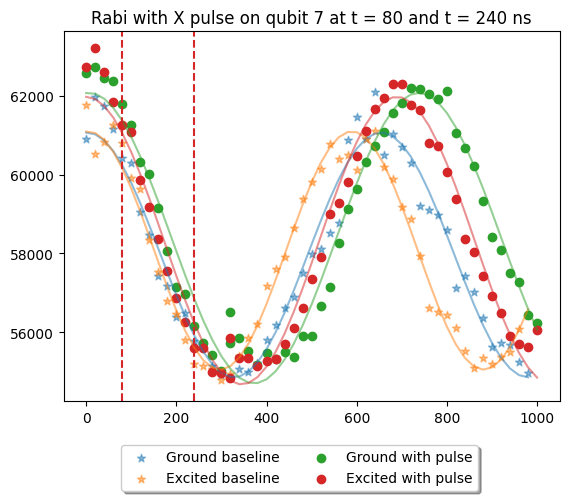

In [14]:
rabi_gnd_results = np.load('crtl_gnd_results.npy')
rabi_exc_results = np.load('crtl_exc_results.npy' )
rabi_pulse_length = np.load('rabi_pulse_length.npy')
two_X_gnd_results = np.load(f'two_X_at_{time_X_pulse_start}_and_{time_2nd_X_pulse_start}_gnd_results.npy')
two_X_exc_results = np.load(f'two_X_at_{time_X_pulse_start}_and_{time_2nd_X_pulse_start}_exc_results.npy')
two_X_total_length = np.load(f'two_X_at_{time_X_pulse_start}_and_{time_2nd_X_pulse_start}_total_length.npy')

# Plotting results
plt.scatter(rabi_pulse_length, rabi_gnd_results, color="C0",label = 'Ground baseline', marker='*',alpha = 0.5)
plt.scatter(rabi_pulse_length, rabi_exc_results, color="C1",label = 'Excited baseline', marker='*',alpha = 0.5)
plt.scatter(two_X_total_length[two_X_gnd_results>10], two_X_gnd_results[two_X_gnd_results>10], color="C2", label = 'Ground with pulse')
plt.scatter(two_X_total_length[two_X_exc_results>10], two_X_exc_results[two_X_exc_results>10], color="C3", label = 'Excited with pulse')

rabi_gnd_results_fitted, params = fit_cosine_curve(rabi_pulse_length,rabi_gnd_results)
rabi_exc_results_fitted, params = fit_cosine_curve(rabi_pulse_length,rabi_exc_results)
two_X_gnd_results_fitted, params = fit_cosine_curve(two_X_total_length,two_X_gnd_results)
two_X_exc_results_fitted, params = fit_cosine_curve(two_X_total_length,two_X_exc_results)

plt.plot(rabi_pulse_length,rabi_gnd_results_fitted, color="C0",alpha = 0.5)
plt.plot(rabi_pulse_length,rabi_exc_results_fitted, color="C1",alpha = 0.5)
plt.plot(two_X_total_length,two_X_gnd_results_fitted, color="C2",alpha = 0.5)
plt.plot(two_X_total_length,two_X_exc_results_fitted, color="C3",alpha = 0.5)



plt.axvline(time_X_pulse_start,linestyle = 'dashed', color = 'C3')
plt.axvline(time_2nd_X_pulse_start,linestyle = 'dashed', color = 'C3')

#plt.scatter(rabi_pulse_length, crtl_exc_results, color="orange")
plt.legend(bbox_to_anchor=(0.85, -0.1),shadow=True, ncol=2)
plt.savefig('rabi_exc_time_X_pulse_start.png')  # Saving plot as image file
plt.title(f"Rabi with X pulse on qubit 7 at t = {time_X_pulse_start} and t = {time_2nd_X_pulse_start} ns")

Text(0.5, 1.0, 'Rabi with X pulse on qubit 7 at t = 80 and t = 240 ns')

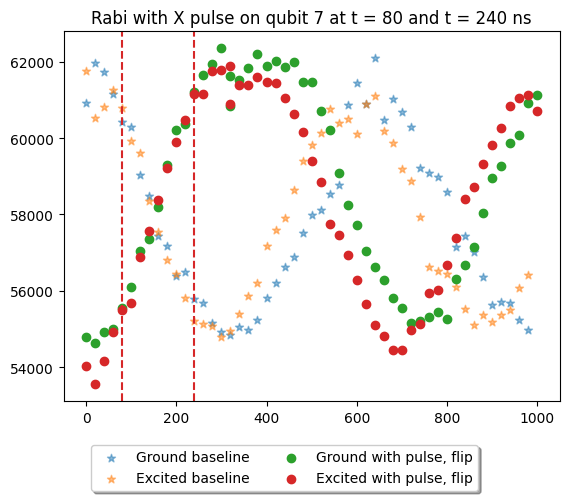

: 

In [15]:
two_X_gnd_flip = flip_around_average(two_X_gnd_results)
two_X_exc_flip = flip_around_average(two_X_exc_results)

# Plotting results
plt.scatter(rabi_pulse_length, rabi_gnd_results, color="C0",label = 'Ground baseline', marker='*',alpha = 0.5)
plt.scatter(rabi_pulse_length, rabi_exc_results, color="C1",label = 'Excited baseline', marker='*',alpha = 0.5)
plt.scatter(two_X_total_length, two_X_gnd_flip, color="C2", label = 'Ground with pulse, flip')
plt.scatter(two_X_total_length, two_X_exc_flip, color="C3", label = 'Excited with pulse, flip')

plt.axvline(time_X_pulse_start,linestyle = 'dashed', color = 'C3')
plt.axvline(time_2nd_X_pulse_start,linestyle = 'dashed', color = 'C3')

#plt.scatter(rabi_pulse_length, crtl_exc_results, color="orange")
plt.legend(bbox_to_anchor=(0.85, -0.1),shadow=True, ncol=2)
plt.savefig('rabi_exc_time_X_pulse_start_flip.png')  # Saving plot as image file
plt.title(f"Rabi with X pulse on qubit 7 at t = {time_X_pulse_start} and t = {time_2nd_X_pulse_start} ns")
